4. Now modify the code such that you sample the position of two particles
in 3D connected by a spring of equilibrium length L=4

U (q1, q2) = 1/2 (|q1 −q2|−L)^2

Notice that q1 and q2 are now vectors with three components each. (Hint:
at every iteration, choose randomly one of the two particles and one of the
three possible components and displace it by a random displacement uni-
formly distributed in [−∆, +∆]). Compute the average distance |q1 −q2|
between the two particles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rm

In [2]:
# uniform distribution [-delta,+delta]
def trial(q1,q2,delta):
    if (rm.randrange(0,2))==0:
        q1+=(rm.random()*2-1)*delta
    else:
        q2+=(rm.random()*2-1)*delta
    return q1,q2

In [3]:
# potential energy
def u(q1,q2,L=4):
    return 1/2*(np.abs(q1-q2)-L)**2

In [5]:
def run(*,kT=1,delta=1,nsteps=100,q1=0.0,q2=1.0):

    #traj1=[]
    time=[]
    distance=[]
    avalpha=0


    #traj1.append(q1)#,q2)
    time.append(0)
    distance.append(np.abs(q1-q2))
    u0=u(q1,q2)

    for istep in range(nsteps):
        q1try,q2try=trial(q1,q2,delta)
        norm=np.abs(q1-q2)
        utry=u(q1,q2)
        alpha=np.exp(-(utry-u0)/kT)
        # if alpha>1: alpha=1
        if alpha>rm.random():
        #if utry<u0: # limit of zero temperature
            avalpha+=1
            q1=q1try
            q2=q2try
            u0=utry
        
        distance.append(np.abs(q1-q2))
        #traj1.append(q1)
        time.append(istep)

    avalpha=avalpha/nsteps    

    return np.array(time),distance,avalpha #np.array(traj),avalpha,q2mean

average acceptance:  0.9532
mean distance:  2.2827537293171787


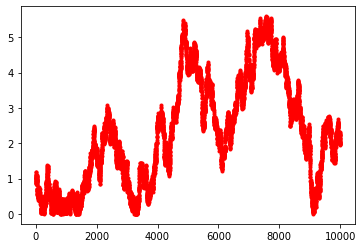

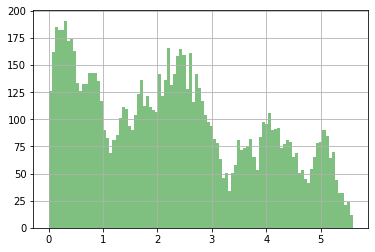

In [16]:
nsteps=10000
kT=1
delta=0.1
q1=0.0
q2=1.0

time,distance,avalpha=run(kT=kT,delta=delta,nsteps=nsteps,q1=q1,q2=q2)
print('average acceptance: ',avalpha)
#print('distance:',distance)
print('mean distance: ',np.mean(distance))
#print('std distance: ',np.std(distance)/np.sqrt(nsteps))
#print(distance)
plt.figure(1)
plt.plot(time,distance,'.r',label='distance(time)')

plt.figure(2)
nbins=100
n, bins, patches = plt.hist(distance, nbins,facecolor='green', alpha=0.5)
plt.grid(axis='both')
plt.show()

4.946237765387346
0.2193151826099383


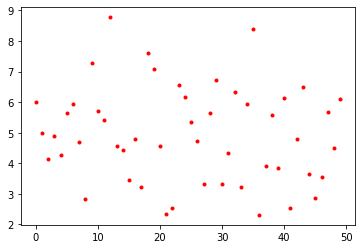

In [144]:
nsteps=10000
kT=0.5
delta=0.1

niter=50
meandistances=[]
iiter=[]

for i in range(niter):
    time,distance,alpha=run(kT=kT,delta=delta,nsteps=nsteps,q1=np.array([0.0,0.0,0.0]),q2=np.array([1.0,1.0,3.5]))
    meandistances.append(np.mean(distance))
    iiter.append(i)

#print(meandistances)
plt.plot(iiter,meandistances,'.r')
meandistance=np.mean(meandistances)
stdmeandistance=np.std(meandistances)/np.sqrt(niter)
print(meandistance)
print(stdmeandistance)

In [13]:
q1=[0,0,0]
q2=[0,0,0]
d=np.linalg.norm(q1-q2)
print(d)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
def run2(*,kT=1,delta=1,nsteps=100,q=np.array([0.0,0.0,0.0,0.0,0.0,0.0])):

    #traj1=[]
    time=[]
    distance=[]
    avalpha=0


    #traj1.append(q1)#,q2)
    time.append(0)
    q1=[q[0],q[1],q[2]]
    q2=[q[3],q[4],q[5]]
    distance.append(np.linalg.norm(q1-q2))
    u0=u(q1,q2)

    for istep in range(nsteps):
        q1try,q2try=trial(q1,q2,delta)
        utry=u(q1try,q2try)
        alpha=np.exp(-(utry-u0)/kT)
        # if alpha>1: alpha=1
        if alpha>rm.random():
        #if utry<u0: # limit of zero temperature
            avalpha+=1
            q1=q1try
            q2=q2try
            u0=utry
        
        distance.append(np.linalg.norm(q1-q2))
        #traj1.append(q1)
        time.append(istep)

    avalpha=avalpha/nsteps    

    return np.array(time),distance,avalpha #np.array(traj),avalpha,q2mean